# **Dự án phân tích dữ liệu thương mại điện tử - Phân tích dữ liệu**

## Mục tiêu
- Phân tích dữ liệu đã làm sạch để tìm insight về doanh thu, sản phẩm bán chạy, và hành vi khách hàng.
- Chuẩn bị dữ liệu cho trực quan hóa và báo cáo.

## Dữ liệu đầu vào
- `cleaned_orders.csv`: Thông tin đơn hàng đã làm sạch (~99,441 dòng).
- `cleaned_order_items.csv`: Chi tiết sản phẩm đã làm sạch (~112,650 dòng).

In [2]:
# Import thư viện cần thiết
import pandas as pd
import numpy as np

# Đọc file CSV đã làm sạch
orders = pd.read_csv('D:/Ecommerce_Analysis/data/cleaned_data/cleaned_orders.csv')
order_items = pd.read_csv('D:/Ecommerce_Analysis/data/cleaned_data/cleaned_order_items.csv')
products = pd.read_csv('D:/Ecommerce_Analysis/data/cleaned_data/cleaned_products.csv')



# Xác nhận kiểu dữ liệu và kích thước
print("Kiểu dữ liệu của orders:")
print(orders.dtypes)
print("\nKiểu dữ liệu của order_items:")
print(order_items.dtypes)
print("\nKiểu dữ liệu của products:")
print(products.dtypes)
print("\nKích thước orders:", orders.shape)
print("Kích thước order_items:", order_items.shape)
print("Kích thước products:", products.shape)

Kiểu dữ liệu của orders:
order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

Kiểu dữ liệu của order_items:
order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

Kiểu dữ liệu của products:
product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: ob

In [3]:
# Vì lưu file CSV có thể mất định dạng datetime, cần khôi phục
# Chuyển đổi lại các cột thời gian trong orders
date_columns = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]
for col in date_columns:
    orders[col] = pd.to_datetime(orders[col], errors='coerce')

# Chuyển đổi shipping_limit_date trong order_items
order_items['shipping_limit_date'] = pd.to_datetime(order_items['shipping_limit_date'], errors='coerce')

# Kiểm tra lại
print("\nKiểu dữ liệu sau khi chuyển đổi:")
print("\norders:")
print(orders.dtypes)
print("\norder_items:")
print(order_items.dtypes)
print("\nproducts:")
print(products.dtypes)


Kiểu dữ liệu sau khi chuyển đổi:

orders:
order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

order_items:
order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

products:
product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm         

In [5]:
# Import thư viện trực quan hóa
import matplotlib.pyplot as plt
import seaborn as sns

# Thiết lập style cho seaborn
sns.set_style("whitegrid")
%matplotlib inline

## **Câu hỏi kinh doanh (Business Questions)**
- a1. Sản phẩm nào bán chạy nhất trong các tháng?
- a2. Doanh thu theo danh mục sản phẩm như thế nào?
- b2. Khách hàng thường mua vào thời gian nào trong ngày/tuần?
- b3. Tỷ lệ khách hàng quay lại mua lần 2 là bao nhiêu?
- b4. Thời gian trung bình giữa các lần mua là bao lâu?
- c1. Thời gian giao hàng trung bình là bao lâu?
- c2. Có bao nhiêu đơn bị giao trễ? Tỷ lệ là bao nhiêu?
- e1. Doanh thu tháng sau dự kiến là bao nhiêu?
- e2. Xu hướng đơn hàng theo tuần/tháng có tăng hay giảm?
- e3. Sản phẩm nào đang có xu hướng tăng trưởng nhanh?
### Ghi chú
- Sẽ tập trung vào 10 câu hỏi này trong bước đầu.
- Có thể mở rộng sang các file khác (như `order_payments`, `oder_review`) nếu cần.

### **Phân tích 1 (a1): Sản phẩm bán chạy nhất trong các tháng**

Sản phẩm bán chạy nhất theo tháng:
         month                        product_id  quantity_sold
0      2016-09  5a6b04657a4c5ee34285d1e4619a96b4              3
257    2016-10  eba7488e1c67729f045ab43fac426f2e             11
278    2016-12  f5d8f4fbc70ca2a0038b9a0010ed5cb0              1
413    2017-01  37eb69aca8718e843d897aa7b82f462d             15
1704   2017-02  a703f5ade6e4fae527357132230ea778             13
3013   2017-03  7e0dc102074f8285580c9777f79c90cf             45
4902   2017-04  99a4788cb24856965c36a24e339b6058             34
7009   2017-05  99a4788cb24856965c36a24e339b6058             58
8489   2017-06  42a2c92a0979a949ca4ea89ec5c7b934             73
11522  2017-07  99a4788cb24856965c36a24e339b6058             60
15243  2017-08  f1c7f353075ce59d8a6f3cf58f419c9c             52
16139  2017-09  422879e10f46682990de24d770e7f83d             37
18990  2017-10  422879e10f46682990de24d770e7f83d             39
22319  2017-11  422879e10f46682990de24d770e7f83d             91
26594

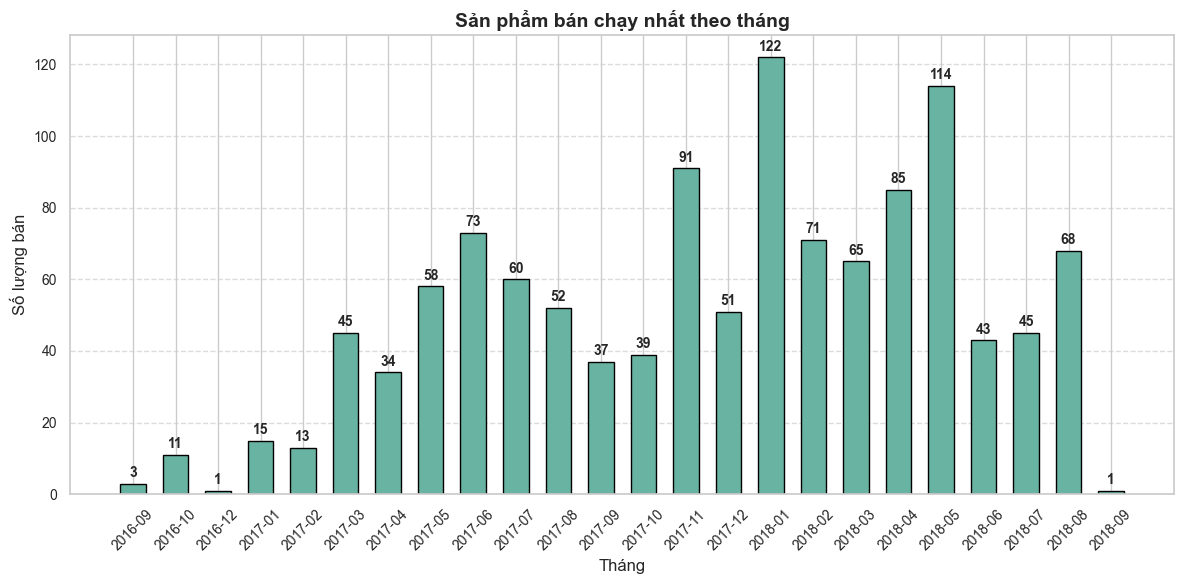

In [35]:
# Thêm cột tháng từ order_purchase_timestamp
orders['month'] = orders['order_purchase_timestamp'].dt.to_period('M')

# Gộp dữ liệu để tính số lượng theo product_id và tháng
merged_data = pd.merge(order_items, orders[['order_id', 'month']], on='order_id', how='left')
top_products_by_month = merged_data.groupby(['month', 'product_id']).size().reset_index(name='quantity_sold')

# Lấy sản phẩm bán chạy nhất mỗi tháng
top_products_monthly = top_products_by_month.loc[top_products_by_month.groupby('month')['quantity_sold'].idxmax()]
print("Sản phẩm bán chạy nhất theo tháng:")
print(top_products_monthly)

# Vẽ biểu đồ cột đẹp hơn
plt.figure(figsize=(12, 6))
bars = plt.bar(top_products_monthly['month'].astype(str), 
               top_products_monthly['quantity_sold'], 
               color='#69b3a2', edgecolor='black', width=0.6)

# Thêm chỉ số trên đầu mỗi cột
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{height:,}', 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# Cải thiện giao diện chung
plt.title('Sản phẩm bán chạy nhất theo tháng', fontsize=14, fontweight='bold')
plt.xlabel('Tháng', fontsize=12)
plt.ylabel('Số lượng bán', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Kết quả trực quan hóa 1 (a1):**
- Biểu đồ cột cho thấy sản phẩm bán chạy nhất theo tháng.
- ***Quan sát***:
  - Có xu hướng tăng trưởng rõ rệt từ giữa 2017 đến giữa 2018.
  - Đỉnh cao nhất là vào tháng 2018-01 với 122 đơn hàng cho một sản phẩm.
  - Một số tháng như 2016-12 và 2018-09 có sản phẩm top nhưng bán rất ít (chỉ 1 đơn)

### **Phân tích 2 (a2): Doanh thu theo danh mục sản phẩm như thế nào?**

Top 10 danh mục sản phẩm có doanh thu cao nhất:
product_category_name
beleza_saude              1258681.34
relogios_presentes        1205005.68
cama_mesa_banho           1036988.68
esporte_lazer              988048.97
informatica_acessorios     911954.32
moveis_decoracao           729762.49
cool_stuff                 635290.85
utilidades_domesticas      632248.66
automotivo                 592720.11
ferramentas_jardim         485256.46
Name: price, dtype: float64


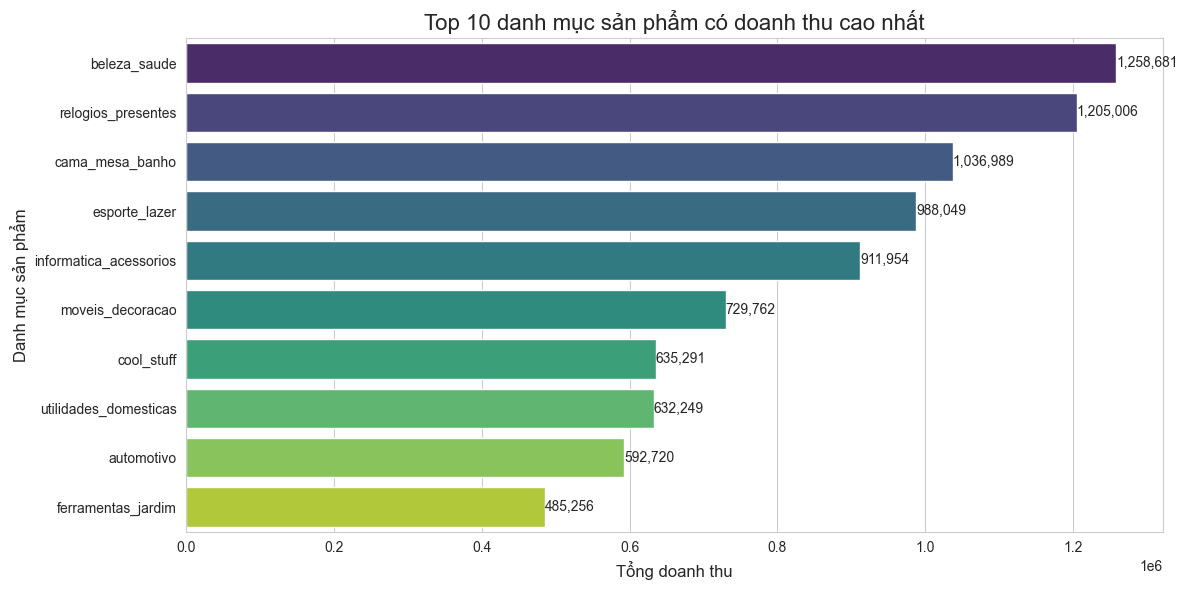

In [15]:
# Tính tổng doanh thu theo product_id
merged_data_category = pd.merge(order_items, products[['product_id', 'product_category_name']], on='product_id', how='left')
revenue_by_product = merged_data_category.groupby('product_category_name')['price'].sum().sort_values(ascending=False).head(10)
print("Top 10 danh mục sản phẩm có doanh thu cao nhất:")
print(revenue_by_product)

# Chuyển revenue_by_product thành DataFrame để dễ xử lý với hue
df_plot = revenue_by_product.reset_index()
df_plot.columns = ['product_category_name', 'revenue']

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_plot,
    x='revenue',
    y='product_category_name',
    hue='product_category_name',
    palette='viridis',
    dodge=False,
    legend=False
)

# Thêm tiêu đề và nhãn
plt.title('Top 10 danh mục sản phẩm có doanh thu cao nhất', fontsize=16)
plt.xlabel('Tổng doanh thu', fontsize=12)
plt.ylabel('Danh mục sản phẩm', fontsize=12)

# Hiển thị giá trị trên cột
for i, v in enumerate(df_plot['revenue']):
    plt.text(v, i, f'{v:,.0f}', va='center', ha='left', fontsize=10)

plt.tight_layout()
plt.show()

**Kết quả trực quan hóa 2 (a2):**

Top 10 danh mục có doanh thu cao nhất tập trung vào làm đẹp – sức khỏe, quà tặng, đồ gia dụng và công nghệ. Trong đó, beleza_saude dẫn đầu với hơn 1,25 triệu doanh thu, cho thấy nhu cầu tiêu dùng mạnh ở các mặt hàng phục vụ chăm sóc cá nhân và tiện nghi sinh hoạt. Các danh mục còn lại cũng phản ánh xu hướng mua sắm đa dạng và thiên về cá nhân hóa.

### **Phân tích 3 (b2): Khách hàng thường mua vào thời gian nào trong ngày?**

Số lượng bán theo giờ:
    hour     time_range  quantity_sold
0      0  00:00 - 01:00           2717
1      1  01:00 - 02:00           1289
2      2  02:00 - 03:00            584
3      3  03:00 - 04:00            314
4      4  04:00 - 05:00            244
5      5  05:00 - 06:00            218
6      6  06:00 - 07:00            556
7      7  07:00 - 08:00           1377
8      8  08:00 - 09:00           3377
9      9  09:00 - 10:00           5449
10    10  10:00 - 11:00           7034
11    11  11:00 - 12:00           7432
12    12  12:00 - 13:00           6819
13    13  13:00 - 14:00           7403
14    14  14:00 - 15:00           7565
15    15  15:00 - 16:00           7370
16    16  16:00 - 17:00           7653
17    17  17:00 - 18:00           7010
18    18  18:00 - 19:00           6550
19    19  19:00 - 20:00           6716
20    20  20:00 - 21:00           6875
21    21  21:00 - 22:00           6920
22    22  22:00 - 23:00           6541
23    23  23:00 - 00:00           4637


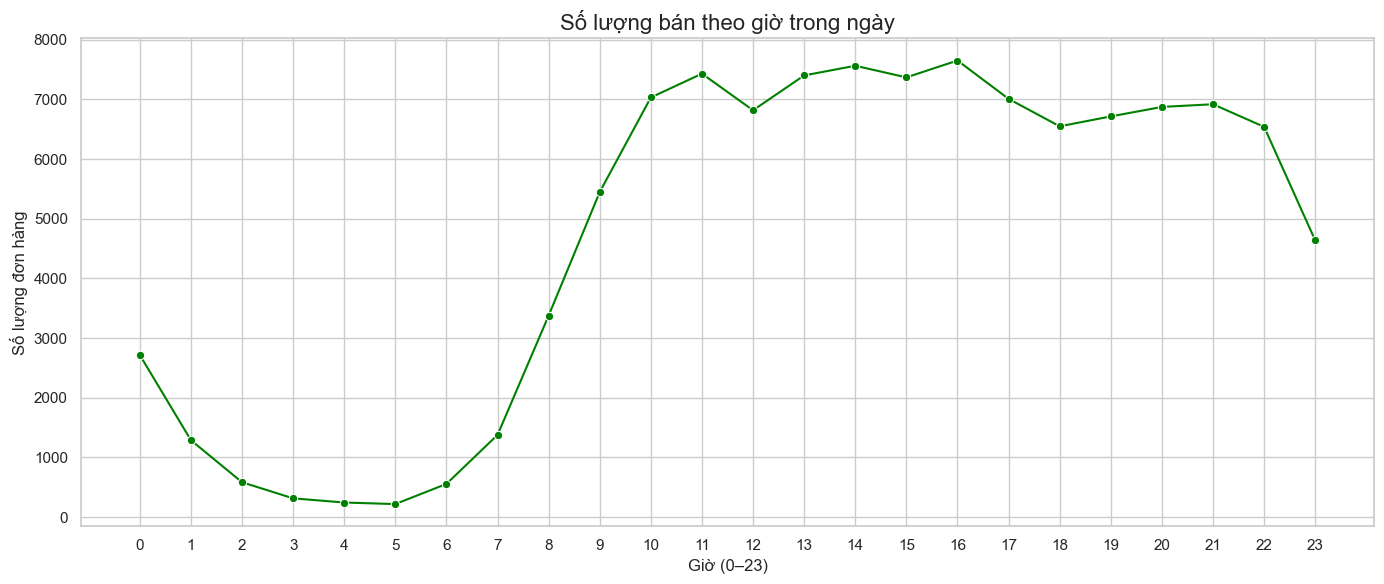

In [18]:
# Tạo cột giờ từ thời gian đặt hàng
orders['hour'] = orders['order_purchase_timestamp'].dt.hour

# Gộp dữ liệu để tính số lượng bán theo giờ
merged_data_by_hour = pd.merge(order_items, orders[['order_id', 'hour']], on='order_id', how='left')
quantity_sold_by_hour = merged_data_by_hour.groupby(['hour']).size().reset_index(name='quantity_sold')

# Thêm cột khoảng thời gian dạng 'HH:00 - HH+1:00'
quantity_sold_by_hour['time_range'] = quantity_sold_by_hour['hour'].apply(
    lambda h: f"{h:02d}:00 - {(h + 1)%24:02d}:00"
)

# In kết quả
print("Số lượng bán theo giờ:")
print(quantity_sold_by_hour[['hour','time_range', 'quantity_sold']])

plt.figure(figsize=(14, 6))
sns.lineplot(
    data=quantity_sold_by_hour,
    x='hour',
    y='quantity_sold',
    marker='o',
    color='green'
)

plt.title('Số lượng bán theo giờ trong ngày', fontsize=16)
plt.xlabel('Giờ (0–23)', fontsize=12)
plt.ylabel('Số lượng đơn hàng', fontsize=12)
plt.xticks(range(0, 24))  # đảm bảo hiển thị đủ 24 giờ

plt.grid(True)
plt.tight_layout()
plt.show()


**Kết quả trực quan hóa 3 (b1):**
Dữ liệu cho thấy xu hướng bán hàng trong ngày có sự phân hóa rõ rệt giữa các khung giờ:
- Khung giờ thấp điểm: Từ 00:00 đến 07:00, số lượng bán rất thấp, đặc biệt từ 02:00 đến 05:00 gần như chạm đáy (dưới 600 đơn/giờ), phản ánh hành vi tiêu dùng hạn chế vào ban đêm và rạng sáng.
- Khung giờ tăng trưởng mạnh: Bắt đầu từ 08:00, số lượng đơn hàng tăng nhanh chóng và đạt đỉnh trong khoảng từ 10:00 đến 17:00 – đây là khoảng thời gian hoạt động mua sắm diễn ra sôi động nhất.
  - Đỉnh cao nhất ghi nhận tại 16:00 - 17:00 với 7.653 đơn hàng, tiếp cận sát là các khung giờ 14h và 11h.
- Chiều tối đến đêm: Từ 18:00 đến 22:00, lượng bán vẫn duy trì ở mức cao nhưng có dấu hiệu giảm nhẹ. Sau 22:00, số lượng đơn hàng giảm rõ rệt, đặc biệt giờ 23:00 chỉ còn 463 đơn – thấp thứ hai sau giờ 5h sáng.

### **Phân tích 4 (c1): Thời gian giao hàng trung bình là bao lâu?**

Tính thời gian trung bình từ lúc đơn hàng được duyệt (`order_approved_at`) đến khi khách nhận được hàng (`order_delivered_customer_date`)

Thời gian giao hàng trung bình: 12 ngày 3 giờ 16 phút


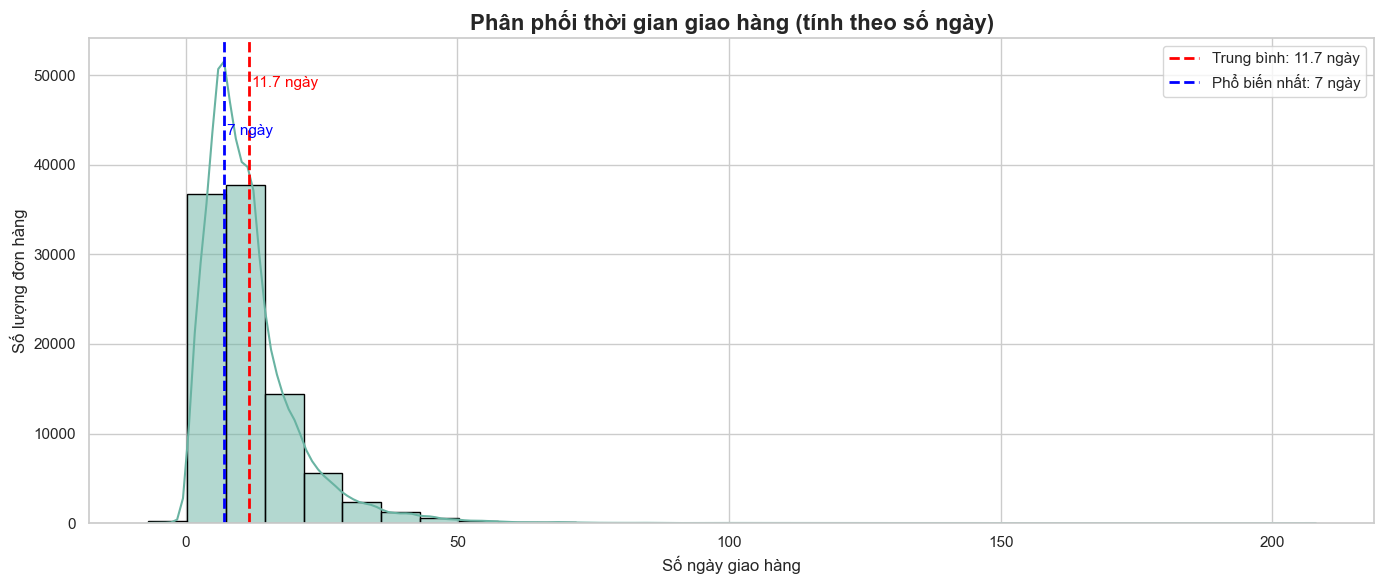

In [24]:
orders['delivery_time'] = orders['order_delivered_customer_date'] - orders['order_approved_at']

# Tính trung bình
average_delivery_time = orders['delivery_time'].mean()

days = average_delivery_time.days
seconds = average_delivery_time.seconds
hours = seconds // 3600
minutes = (seconds % 3600) // 60

# In ra định dạng rõ ràng
print(f"Thời gian giao hàng trung bình: {days} ngày {hours} giờ {minutes} phút")

# Chuyển delivery_time sang đơn vị ngày (số nguyên)
orders['delivery_days'] = orders['delivery_time'].dt.days

# Chuyển thành số ngày (int) để vẽ
orders['delivery_days'] = orders['delivery_time'].dt.days

# Thiết lập style
sns.set(style="whitegrid")

# Tính giá trị trung bình và mode (giá trị phổ biến nhất)
avg_days = orders['delivery_days'].mean()
mode_days = orders['delivery_days'].mode()[0]

# Vẽ biểu đồ
plt.figure(figsize=(14, 6))
ax = sns.histplot(
    data=orders,
    x='delivery_days',
    bins=30,
    kde=True,
    color='#69b3a2',
    edgecolor='black'
)

# Thêm đường trung bình
plt.axvline(avg_days, color='red', linestyle='--', linewidth=2, label=f'Trung bình: {avg_days:.1f} ngày')
plt.axvline(mode_days, color='blue', linestyle='--', linewidth=2, label=f'Phổ biến nhất: {mode_days} ngày')

# Ghi chú trực tiếp trên biểu đồ
plt.text(avg_days + 0.5, plt.ylim()[1]*0.9, f'{avg_days:.1f} ngày', color='red', fontsize=11)
plt.text(mode_days + 0.5, plt.ylim()[1]*0.8, f'{mode_days} ngày', color='blue', fontsize=11)

# Tùy chỉnh tiêu đề và nhãn
plt.title('Phân phối thời gian giao hàng (tính theo số ngày)', fontsize=16, fontweight='bold')
plt.xlabel('Số ngày giao hàng', fontsize=12)
plt.ylabel('Số lượng đơn hàng', fontsize=12)

# Chú thích
plt.legend()

plt.tight_layout()
plt.show()

**Kết quả trực quan hóa 4 (c1):**

Thời gian giao hàng trung bình là 12 ngày 3 giờ 16 phút. Phần lớn đơn hàng được giao trong khoảng từ 5 đến 20 ngày, cho thấy quy trình giao hàng diễn ra tương đối ổn định, nhưng vẫn còn có thể rút ngắn thời gian xử lý nhằm nâng cao trải nghiệm khách hàng.



### **Phân tích 5 (c2): Có bao nhiêu đơn bị giao trễ? Tỷ lệ là bao nhiêu?**

Số đơn bị giao trễ: 8123
Tỷ lệ đơn bị giao trễ: 8.17%


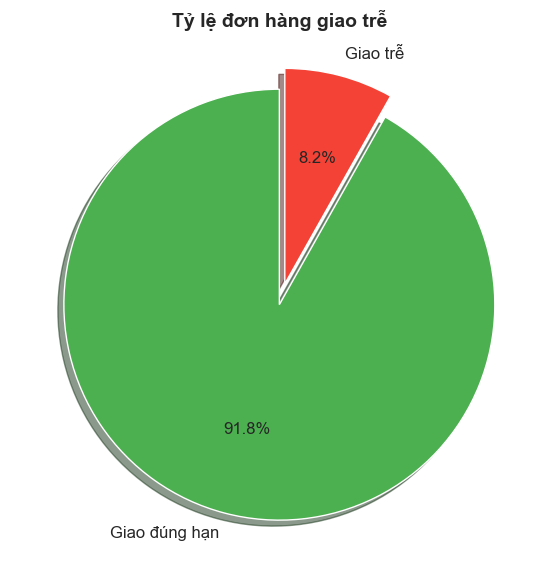

In [28]:
# Tạo cột kiểm tra đơn có bị giao trễ hay không
orders['is_late'] = orders['order_delivered_customer_date'] > orders['order_estimated_delivery_date']

# Đếm số đơn bị trễ
num_late_orders = orders['is_late'].sum()

# Tổng số đơn đã giao
total_delivered_orders = len(orders)

# Tính tỷ lệ trễ
late_delivery_rate = num_late_orders / total_delivered_orders

# In kết quả
print(f"Số đơn bị giao trễ: {num_late_orders}")
print(f"Tỷ lệ đơn bị giao trễ: {late_delivery_rate:.2%}")


# Dữ liệu cho biểu đồ
labels = ['Giao đúng hạn', 'Giao trễ']
sizes = [total_delivered_orders - num_late_orders, num_late_orders]
colors = ['#4CAF50', '#F44336']  # xanh - đỏ
explode = (0, 0.1)  # làm nổi phần "giao trễ"

# Vẽ biểu đồ tròn
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
        startangle=90, explode=explode, shadow=True, textprops={'fontsize': 12})

plt.title('Tỷ lệ đơn hàng giao trễ', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

Trong tổng số đơn hàng đã giao, có **8.17%** bị giao trễ tương đương **8,123** đơn. Mặc dù tỷ lệ trễ không quá cao, nhưng vẫn là một chỉ số cần theo dõi sát sao để nâng cao trải nghiệm khách hàng và tối ưu quy trình vận hành logistics.